In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecom.csv")
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ORD-1001,2022-11-24,2022-11-26,First Class,CUST-859,Customer 36,Consumer,United States,New York City,New York,23434,West,PROD-1520,Technology,Machines,Machines Item 4,234.27,2,0.0,44.58
1,ORD-1002,2022-11-29,2022-12-08,Same Day,CUST-325,Customer 58,Home Office,United States,Houston,Texas,30926,South,PROD-3547,Office Supplies,Labels,Labels Item 28,360.50,6,0.3,18.72
2,ORD-1003,2022-06-26,2022-07-06,Standard Class,CUST-926,Customer 6,Home Office,United States,Tampa,Florida,26361,South,PROD-6925,Furniture,Bookcases,Bookcases Item 74,1420.96,4,0.0,305.96
3,ORD-1004,2022-05-29,2022-05-31,Second Class,CUST-987,Customer 13,Corporate,United States,Dallas,Texas,93320,Central,PROD-6820,Furniture,Bookcases,Bookcases Item 27,1769.46,5,0.0,357.93
4,ORD-1005,2022-03-29,2022-04-07,Second Class,CUST-267,Customer 60,Corporate,United States,Austin,Texas,83000,East,PROD-1916,Technology,Copiers,Copiers Item 30,404.47,1,0.3,33.11


# Convert Date to Datetime Format

In [4]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


In [5]:
df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)


# Group by Monthly Sales

In [6]:

monthly_sales = df.groupby("YearMonth")["Sales"].sum().reset_index()

monthly_sales["YearMonth"] = pd.to_datetime(monthly_sales["YearMonth"])
monthly_sales = monthly_sales.sort_values("YearMonth")


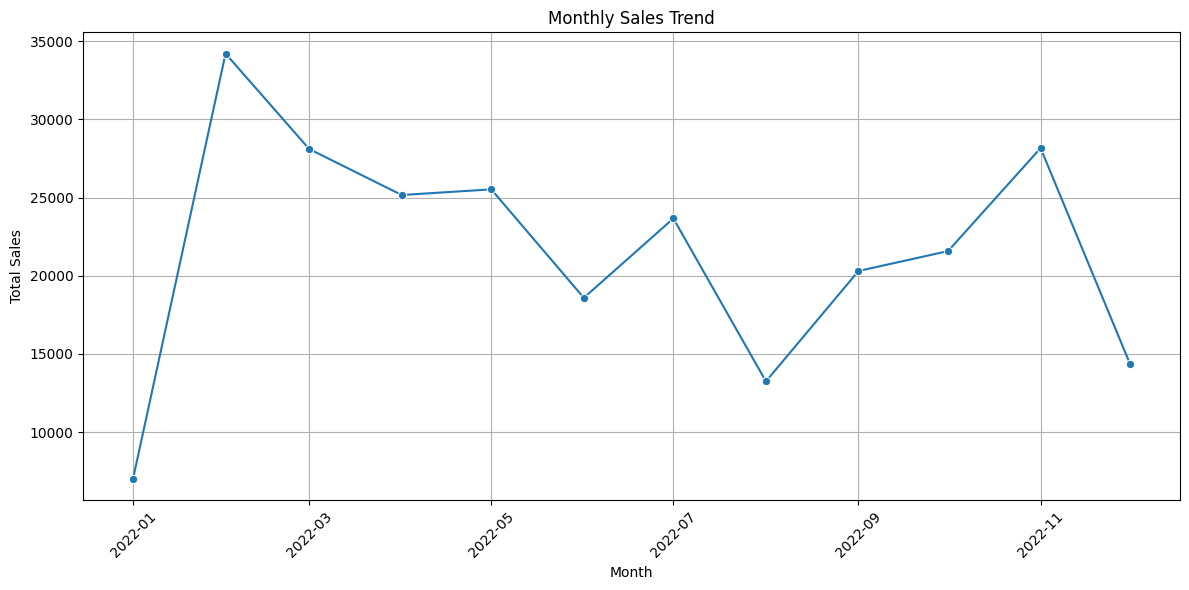

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="YearMonth", y="Sales", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Monthly Sales by Category

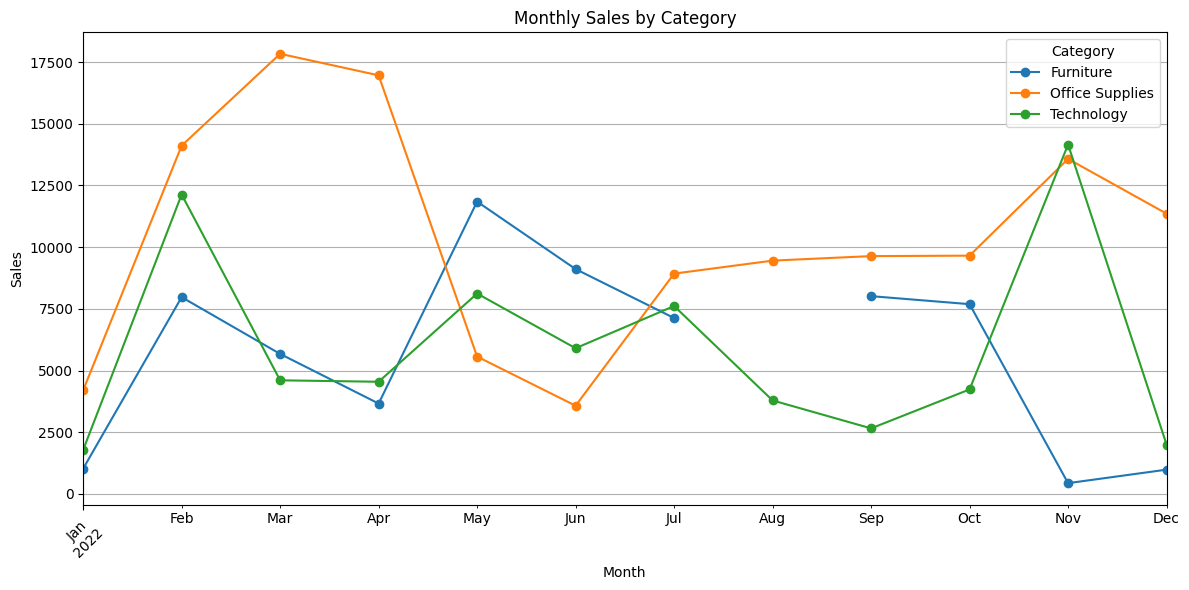

In [8]:
monthly_category_sales = df.groupby([df["Order Date"].dt.to_period("M"), "Category"])["Sales"].sum().unstack()

monthly_category_sales.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Monthly Sales by Sub-Category

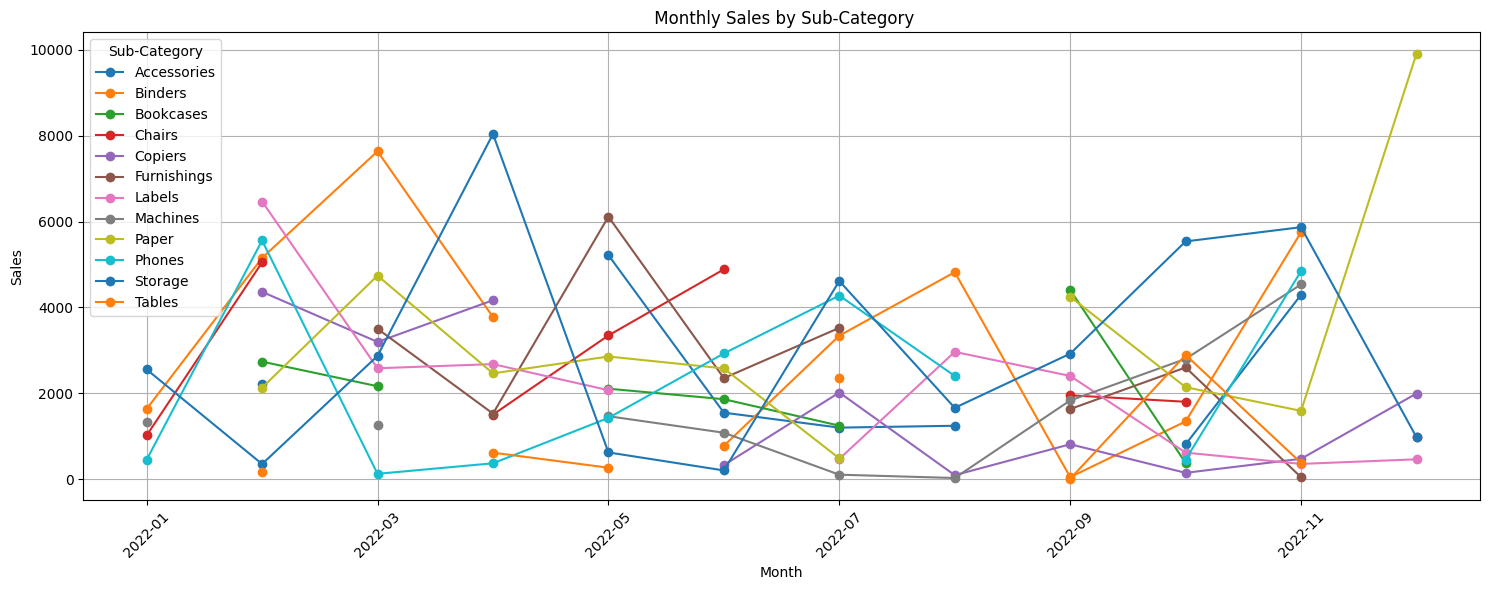

In [11]:

monthly_subcat_sales = df.groupby(["YearMonth", "Sub-Category"])["Sales"].sum().unstack()

# Plot
monthly_subcat_sales.plot(figsize=(15, 6), marker='o')
plt.title(" Monthly Sales by Sub-Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Monthly Profit Analysis

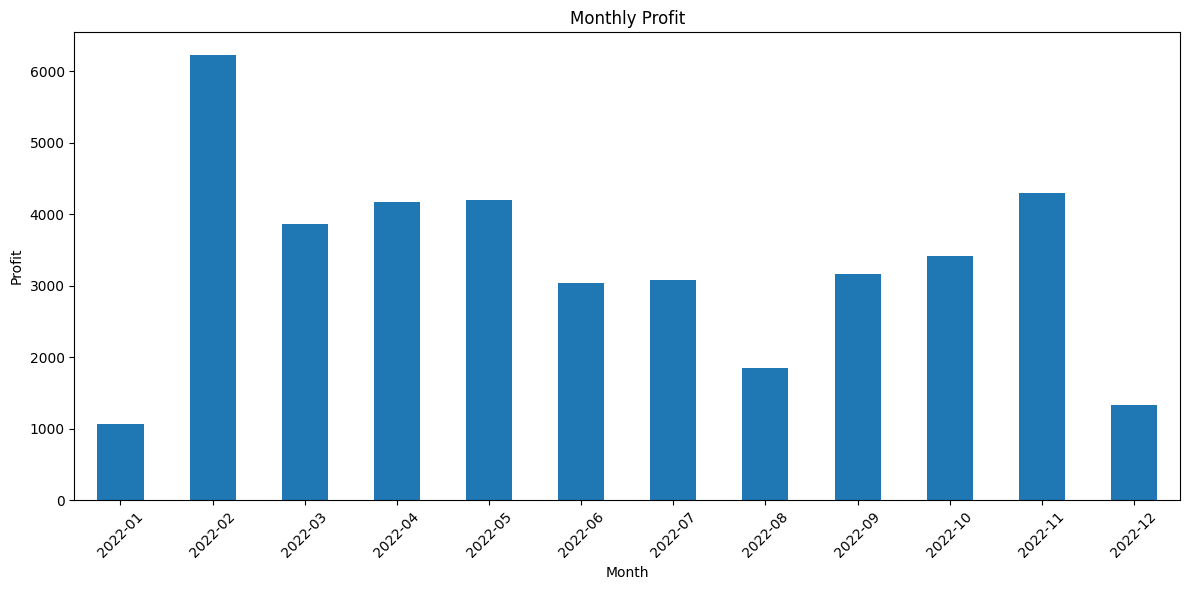

In [9]:
monthly_profit = df.groupby(df["Order Date"].dt.to_period("M"))["Profit"].sum()

monthly_profit.plot(kind="bar", figsize=(12, 6))
plt.title("Monthly Profit")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Profit by Category

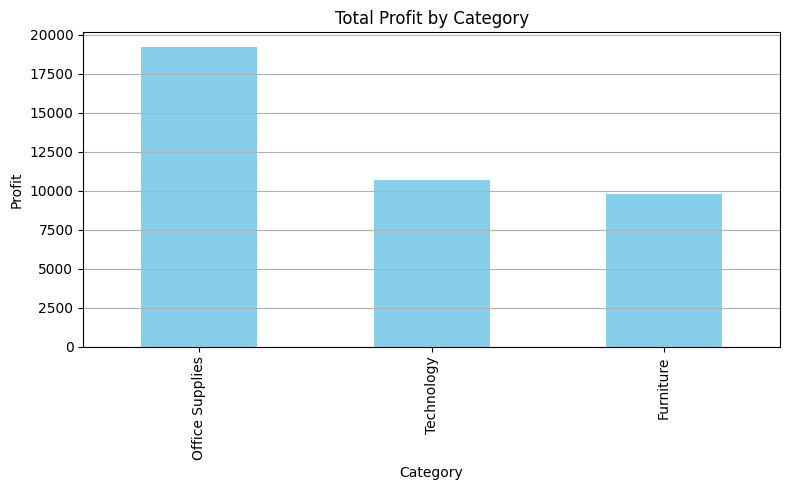

In [16]:

category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)


category_profit.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Month

# Profit by Sub-Category

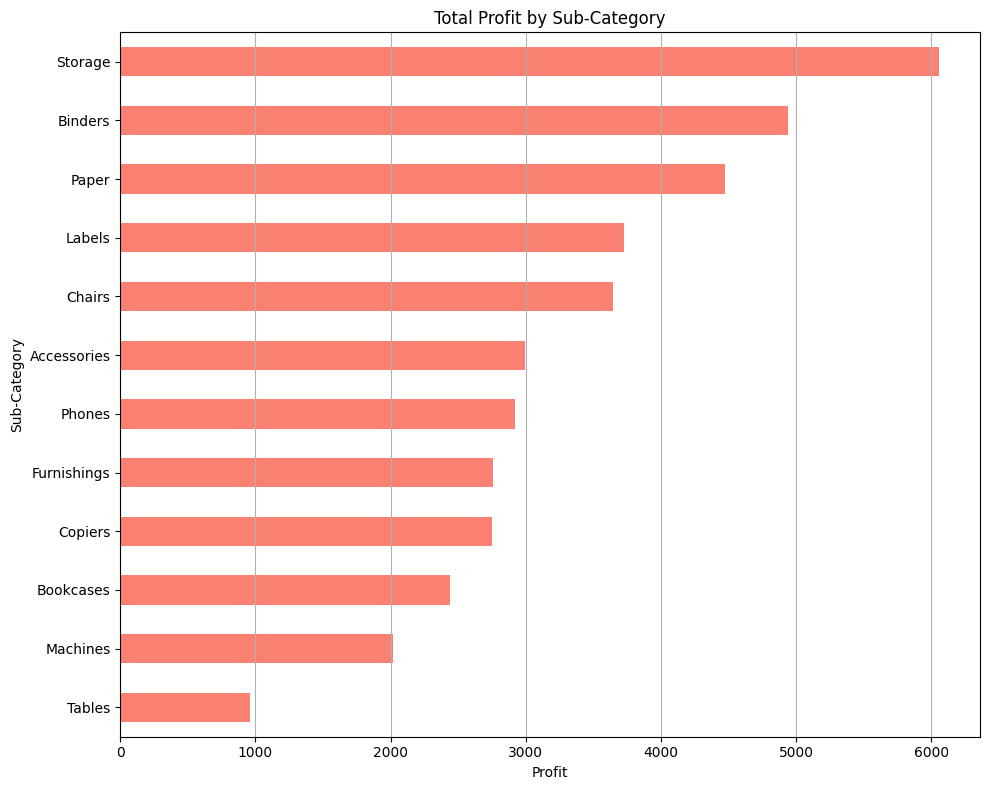

In [14]:
subcategory_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values()


subcategory_profit.plot(kind="barh", figsize=(10, 8), color="salmon")
plt.title("Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.grid(axis="x")
plt.tight_layout()
plt.show()
